In [1]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

In [2]:
def files(f):
    return glob.glob(os.path.join(f))

In [35]:
#creating indexes for each timing file
default_iters = files('iter_default.csv')
default_size = files('lat_default.csv')

mpi_iters = files("./LL_mpi/times/iter_mpi_*.csv")
mpi_size = files("./LL_mpi/times/lat_mpi_*.csv")
mpi_iters.sort()
mpi_size.sort()
mpi_mcstep_iters = mpi_iters[4:8]
mpi_mcstep_size = mpi_size[4:8]
mpi_iters = mpi_iters[0:4]
mpi_size = mpi_size[0:4]

cython_iters = files("./LL_cython/times/iter_cython*.csv")
cython_size = files("./LL_cython/times/lat_cython*.csv")
cython_iters.sort()
cython_size.sort()
cython_mpi_iters = cython_iters[4:8]
cython_mpi_size = cython_size[4:8]
cython_iters = cython_iters[0:4]
cython_size = cython_size[0:4]

numpy_iters = files("./LL_numpy/times/i*.csv")
numpy_size = files("./LL_numpy/times/l*.csv")

numba_iters = files("./LL_numba/times/iter_numba.csv")
numba_size = files("./LL_numba/times/lat_numba.csv")


numba_mpi_iters = files('./LL_numba/times/iter_numba_mpi*.csv')
numba_mpi_size = files('./LL_numba/times/lat_numba_mpi*.csv')


In [36]:
#returns a combined dataframe for the timings
def create_df(files):
    return pd.concat([pd.read_csv(f, index_col= ['Unnamed: 0']).T for f in files]).sort_index()

In [37]:
#creating a dictionary for every timing dataframe
iters = [default_iters, mpi_iters, mpi_mcstep_iters, cython_iters, cython_mpi_iters, numpy_iters, numba_iters, numba_mpi_iters]
size = [default_size, mpi_size, mpi_mcstep_size, cython_size, cython_mpi_size, numpy_size, numba_size, numba_mpi_size]
keys = ['default', 'mpi', 'mpi_mcstep', 'cython', 'cython_mpi', 'numpy', 'numba', 'numba_mpi']
iters_dict = {}
size_dict = {}
for i, k in enumerate(keys):
    iters_dict[k] = create_df(iters[i])
    size_dict[k] = create_df(size[i])

In [6]:
def create_plot(keys):
    fig, ax = plt.subplots(1, 2, figsize = [12,4])
    for key in keys:
        iters_dict[key].T.plot(ax=ax[0], style = 'o-')
        size_dict[key].T.plot(ax=ax[1], style = 'o-')
    ax[0].set_xlabel('Iterations')
    ax[1].set_xlabel('Lattice edge size')
    for i in range(2):
        ax[i].set_ylabel('Time (s)')
        ax[i].grid()
    plt.show()


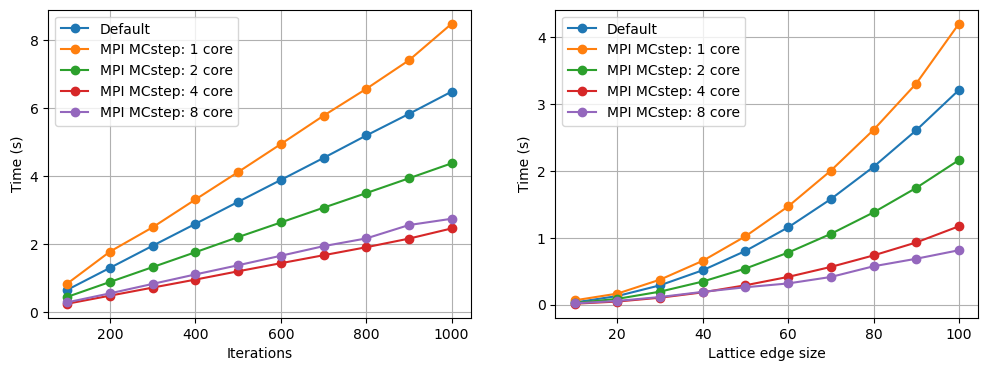

In [7]:
create_plot(['default', 'mpi_mcstep'])

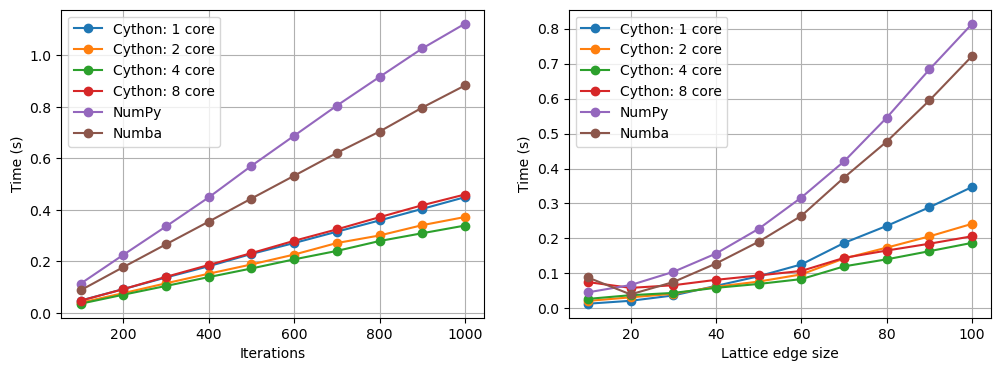

In [8]:
create_plot(['cython', 'numpy', 'numba'])

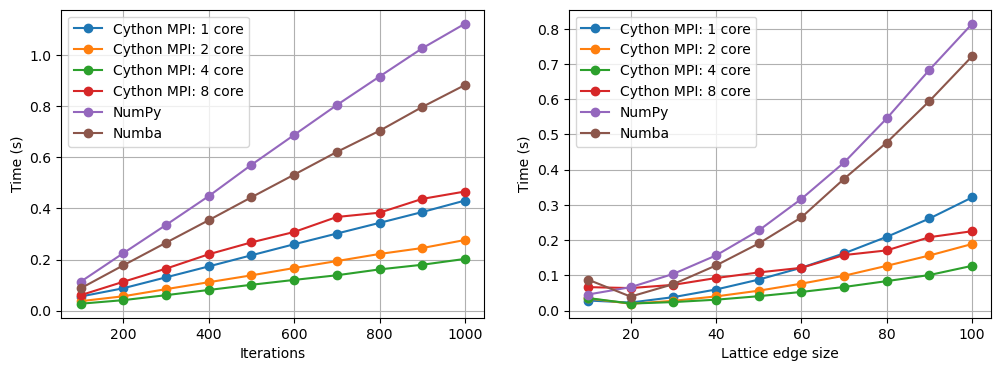

In [10]:
create_plot(['cython_mpi', 'numpy', 'numba'])

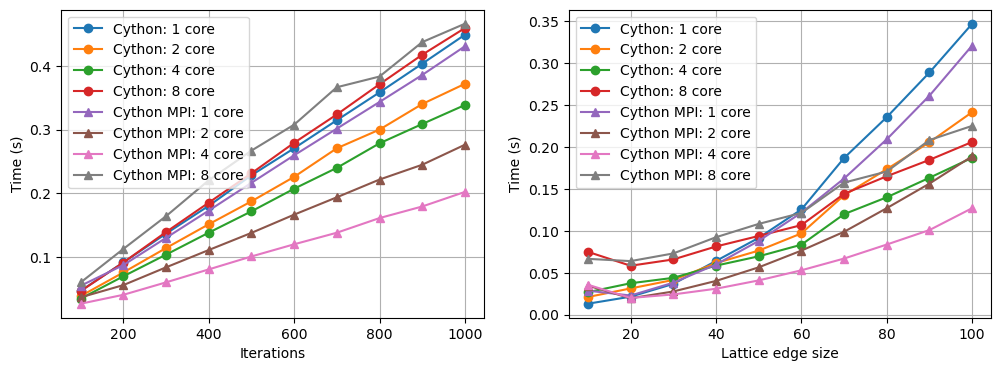

In [13]:
fig, ax = plt.subplots(1, 2, figsize = [12,4])

iters_dict['cython'].T.plot(ax=ax[0], style = 'o-')
size_dict['cython'].T.plot(ax=ax[1], style = 'o-')
iters_dict['cython_mpi'].T.plot(ax=ax[0], style = '^-')
size_dict['cython_mpi'].T.plot(ax=ax[1], style = '^-')
ax[0].set_xlabel('Iterations')
ax[1].set_xlabel('Lattice edge size')
for i in range(2):
    ax[i].set_ylabel('Time (s)')
    ax[i].grid()
plt.show()

In [19]:
cython_mpi_large = files('times/large*.csv')
cyth_mpi_size = create_df(cython_mpi_large)

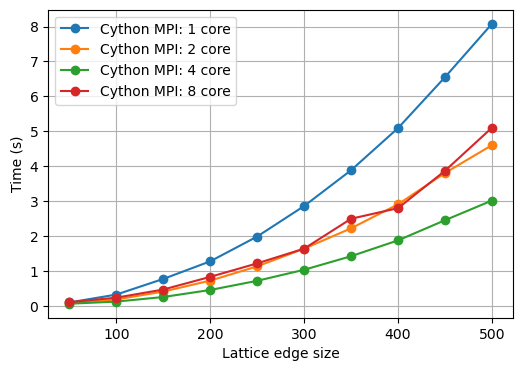

In [ ]:
fig, ax = plt.subplots(figsize = [6,4])
cyth_mpi_size.T.plot(style = 'o-', ax=ax)
ax.set_xlabel('Lattice edge size')
ax.set_ylabel('Time (s)')
ax.grid()

In [27]:
array = np.array([[1, 1],
                  [1, 1],
                  [1, 1]])
array.shape

(3, 2)

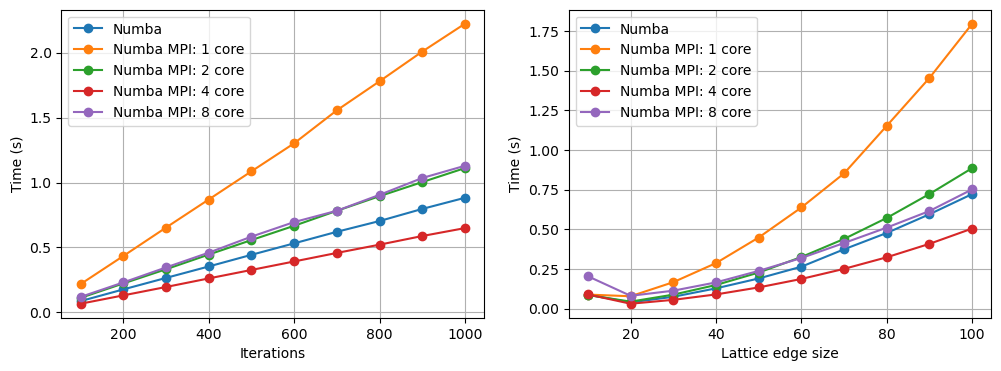

In [38]:
#numba with MPI figures

create_plot(['numba', 'numba_mpi'])

In [159]:
numba_mpi_avg = pd.read_csv(files('./LL_numba/times/avg*.csv')[0], index_col=['Unnamed: 0'])
numba_mpi_avg.T
comparisons = pd.concat([pd.read_csv(f, index_col= ['Unnamed: 0']) for f in files('./times/compare*.csv')]).sort_index()
comparisons.rename(columns = {'0':'Time (s)'}, inplace = True)
comparisons = pd.concat([comparisons, numba_mpi_avg.T])
comparisons['Speedup multiplier'] = comparisons['Time (s)']['Default'] / comparisons['Time (s)']
comparisons['Time (s)'] = comparisons['Time (s)'].apply(lambda x: round(x, 4))
comparisons['Speedup multiplier'] = comparisons['Speedup multiplier'].apply(lambda x: round(x, 2))

In [160]:
comparisons

,Time (s),Speedup multiplier
Cython,0.0949,85.60
Cython MPI,0.0413,196.87
Default,8.1270,1.00
MPI,6.1571,1.32
MPI MC step,2.8170,2.88
NumPy,0.2346,34.64
Numba,0.1787,45.48
Numba MPI,0.1545,52.61


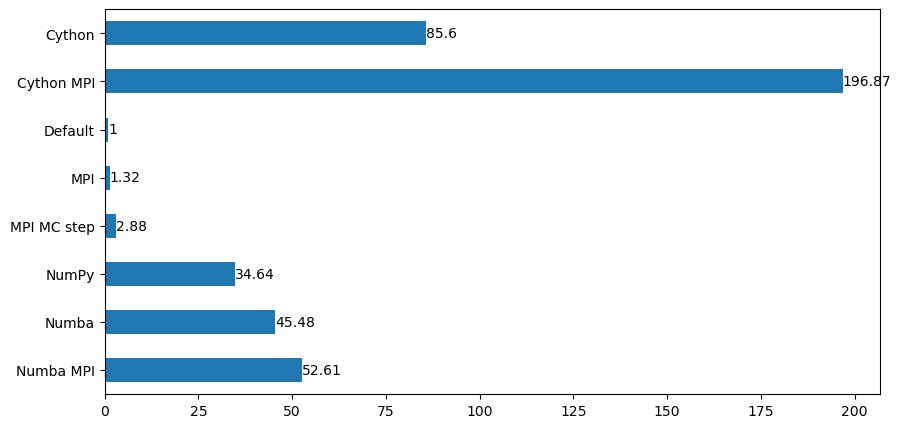

In [161]:
fig, ax = plt.subplots(figsize = [10,5])
comparisons['Speedup multiplier'].sort_index(ascending=False).plot.barh(ax = ax)
ax.bar_label(ax.containers[0])
plt.show()